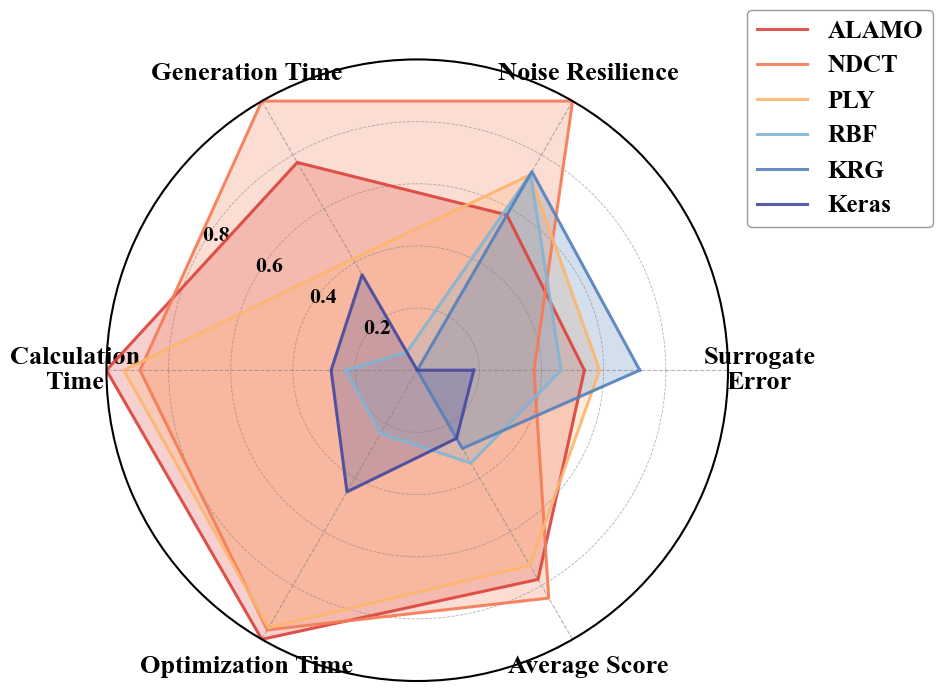

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# ---------- 全局设置 ----------
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.weight'] = 'bold'

# ---------- 模型与颜色 ----------
colors = {
    "ALAMO": "#DB443C",
    "NDCT":  "#F57B56",
    "PLY":   "#FDB670",
    "RBF":   "#82B5D5",
    "KRG":   "#5682BB",
    "Keras": "#454A9F"
}

labels = ["ALAMO", "NDCT", "PLY", "RBF", "KRG", "Keras"]

# ---------- 数据 ----------
data = np.array([
    [0.538, 0.577, 0.772, 1.000, 1.000],
    [0.376, 1.000, 1.000, 0.892, 0.965],
    [0.587, 0.725, 0.414, 0.944, 0.957],
    [0.463, 0.729, 0.067, 0.231, 0.235],
    [0.716, 0.738, 0.000, 0.000, 0.000],
    [0.182, 0.000, 0.355, 0.277, 0.452]
])

# ---------- 添加平均得分 ----------
avg_scores = data.mean(axis=1).reshape(-1, 1)
data = np.hstack([data, avg_scores])

# ---------- 指标 ----------
metrics = [
    'Surrogate\nError', 
    'Noise Resilience',
    'Generation Time', 
    'Calculation\nTime',
    'Optimization Time', 
    'Average Score'
]
num_vars = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# ---------- 绘图 ----------
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for label, values in zip(labels, data):
    values = values.tolist() + [values[0]]
    ax.plot(angles, values, color=colors[label], linewidth=2.2, label=label, alpha=0.9)
    ax.fill(angles, values, color=colors[label], alpha=0.25)

# ---------- 样式 ----------
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=19, fontweight='bold')
ax.tick_params(axis='x', pad=12)
ax.grid(True, color='gray', linestyle='--', linewidth=0.8, alpha=0.6)
ax.spines['polar'].set_visible(True)
ax.spines['polar'].set_linewidth(1.5)

# ---------- 添加虚线圆圈和标签 ----------
r_levels = [0.2, 0.4, 0.6, 0.8]
ax.set_yticks(r_levels)
ax.set_yticklabels([f"{r:.1f}" for r in r_levels], fontsize=16, fontweight='bold')
ax.yaxis.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
ax.set_ylim(0, 1.0)

# 将径向标签旋转到与 x 轴约 150° 方向
ax.set_rlabel_position(150) 

# ---------- 单独移动最左与最右 ----------
texts = ax.get_xticklabels()
offset = 1.15
for i, txt in enumerate(texts):
    metric = metrics[i]
    x, y = txt.get_position()
    if "Surrogate" in metric:
        txt.set_position((x + offset, y))
    elif "Calculation" in metric:
        txt.set_position((x - offset, y))

# ---------- 图例 ----------
legend = plt.legend(
    loc='upper right',
    bbox_to_anchor=(1.35, 1.1),
    frameon=True,
    fontsize=18,
)
legend.get_frame().set_edgecolor('gray')
legend.get_frame().set_linewidth(1.0)
legend.get_frame().set_alpha(0.8)

plt.tight_layout()

# ---------- 保存高分辨率 SVG ----------
plt.savefig("radar_chart.svg", format="svg", dpi=600, bbox_inches="tight")

plt.show()


最终矩阵：
       Generation  Calculation  Optimization     Total
ALAMO       0.772        1.000         1.000  0.924000
NDCT        1.000        0.892         0.965  0.952333
PLY         0.414        0.944         0.957  0.771667
RBF         0.067        0.231         0.235  0.177667
KRG         0.000        0.000         0.000  0.000000
Keras       0.355        0.277         0.452  0.361333


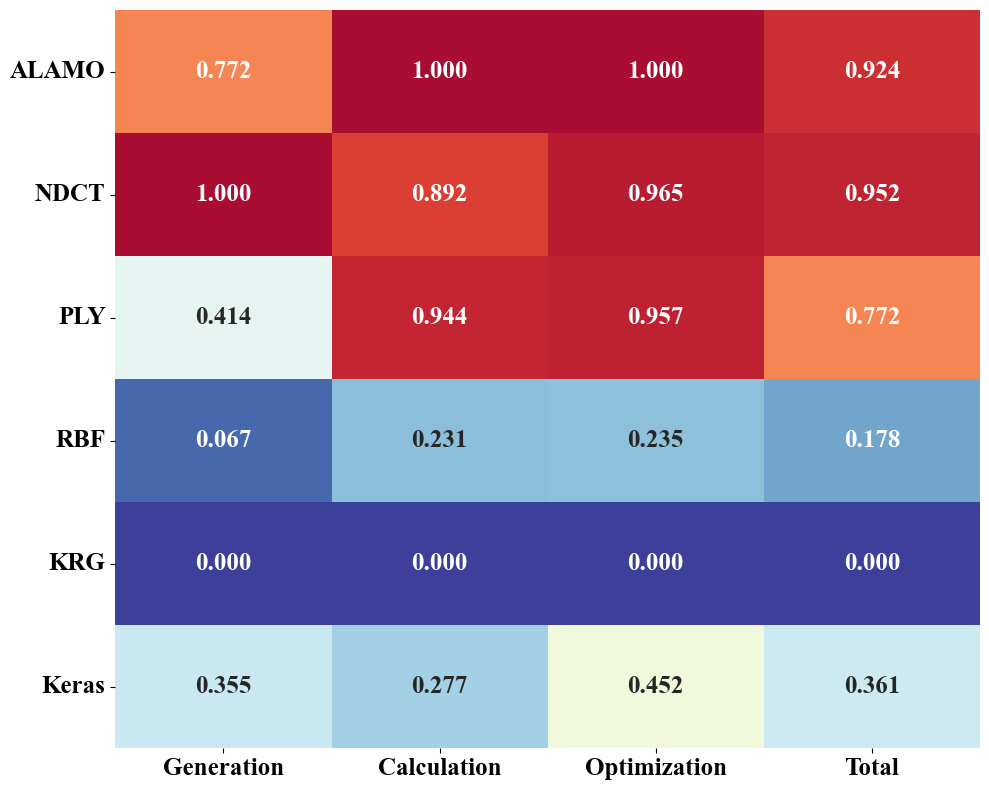

✅ 图片已保存到：D:\lib\gali\Manuscript\fig9 new\heat_plot.svg


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ---------- 数据矩阵 ----------
rows = ["ALAMO", "NDCT", "PLY", "RBF", "KRG", "Keras"]
cols = ["Generation", "Calculation", "Optimization", "Total"]

# 初始化矩阵
df = pd.DataFrame(0.00, index=rows, columns=cols)

# 填入三列原始数值
df["Generation"]   = [0.772, 1.000, 0.414, 0.067, 0.000, 0.355]
df["Calculation"]  = [1.000, 0.892, 0.944, 0.231, 0.000, 0.277]
df["Optimization"] = [1.000, 0.965, 0.957, 0.235, 0.000, 0.452]

# ---------- 计算 Total 列（前三列的平均值） ----------
df["Total"] = df[["Generation", "Calculation", "Optimization"]].mean(axis=1)

print("最终矩阵：")
print(df)

# ---------- 热力图 ----------
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    df,
    annot=True, fmt=".3f", cmap="RdYlBu_r",
    cbar=False,   # 去掉右边颜色条
    annot_kws={"size": 18, "weight": "bold"},
    ax=ax,
    alpha=0.95
)

# 设置字体
ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=18, fontweight="bold",
    rotation=0, ha="center"
)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18, fontweight="bold", rotation=0)

plt.tight_layout()

# ---------- 保存为 SVG ----------
save_dir = r"D:\lib\gali\Manuscript\fig9 new"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "heat_plot.svg")

plt.savefig(save_path, format="svg", bbox_inches="tight")
plt.show()

print(f"✅ 图片已保存到：{save_path}")
